> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset description
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

- There are some odd characters in the ‘cast’ column.

- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question for analysis
 1. Which genres has the most films?
 2. Relation between number of votes and profit
 3. Duration distribution
 4. Number of movies releases though years

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

#### 1. Load data into dataframe

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# pd.options.display.max_rows = 9999
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### 2. Drop unnecessary columns 

In [4]:
# Drop unnecessary columns 
drop_columns = ['imdb_id', 'tagline', 'keywords', 'overview', 'budget_adj', 
                'revenue_adj', 'homepage', 'production_companies']
df = df.drop(drop_columns, axis = 1)
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [5]:
df.shape

(10866, 13)

In [6]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [8]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

#### 3. Drop all duplicated columns from dataframe

In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#### 4. Drop all row with null value

In [11]:
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [12]:
df = df.dropna()
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


### Data Cleaning
 

#### 1. Have a look at data after wrangling steps

In [13]:
df.shape

(10731, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### 2. Convert release_date column to apporiate type

In [16]:
# Check type of release_date
type(df['release_date'][0])

str

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df[['id', 'release_date']].head(2)

,id,release_date
0,135397,2015-06-09
1,76341,2015-05-13


#### 3. Caculate the profit column for further analysis

In [19]:
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


<a id='eda'></a>
## Exploratory Data Analysis

### What kinds of properties are associated with movies that have high revenues?

 #### 1. Which genres has the most films?

In [20]:
def split_columns(data, column):
    genres_list = []
    for row in data[column]:
        for genres in row.split('|'):
            genres_list.append(genres)
    return genres_list

In [21]:
genres_list = split_columns(df, 'genres')
Counter_genres = Counter(genres_list)
Counter_genres

Counter({'Action': 2376,
         'Adventure': 1465,
         'Science Fiction': 1221,
         'Thriller': 2902,
         'Fantasy': 908,
         'Crime': 1353,
         'Western': 164,
         'Drama': 4746,
         'Family': 1214,
         'Animation': 664,
         'Comedy': 3775,
         'Mystery': 808,
         'Romance': 1708,
         'War': 268,
         'History': 330,
         'Music': 399,
         'Horror': 1636,
         'Documentary': 470,
         'TV Movie': 162,
         'Foreign': 184})

In [22]:
df_genres=pd.DataFrame.from_dict(Counter_genres, orient='index', columns = ['number of films']).reset_index()
df_genres.set_index('index', inplace=True)
df_genres
# df_genres.columns


,number of films
index,
Action,2376
Adventure,1465
Science Fiction,1221
Thriller,2902
Fantasy,908
Crime,1353
Western,164
Drama,4746
Family,1214


Text(0,0.5,'Number of movies')

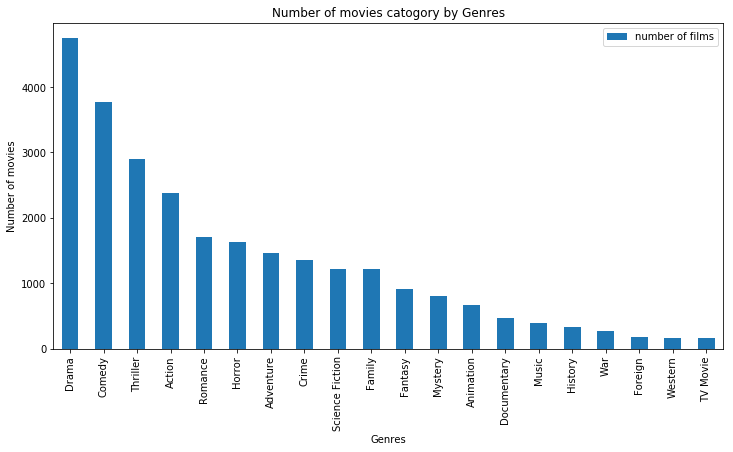

In [23]:
df_genres.sort_values('number of films', ascending=False).plot.bar(figsize=(12,6))
plt.title("Number of movies catogory by Genres")
plt.xlabel("Genres")
plt.ylabel("Number of movies")

#### Conclution 1
 * Drama is the genre that has the most number of films released. 
 * Follower is comedy, thriller, action, and romance.

#### 2. Relation between number of votes and profit

In [ ]:
df_vote_profit = df[['vote_count', 'profit']]
df_vote_profit.head()

In [ ]:
df_vote_profit.plot.scatter('vote_count', 'profit')

# Calculate the Trendline
z = np.polyfit(df_vote_profit['vote_count'], df['profit'], 1)
p = np.poly1d(z)

# Display the Trendline
plt.plot(df['vote_count'], p(df['vote_count']), color='red')

#### Conclusion 2:

* As can be seen, the relationship between vote_count and profit appears to be linear.

* Profit generally increases when the vote_count increases. 

#### 3. Duration distribution

In [ ]:
df_duration = df['runtime']
df_duration.head()

In [ ]:
df_duration.plot.hist(bins=30, range=[0,200])
plt.title("Duration distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")

#### Conclution 3
 * Most of the films longer than 75 minutes and shoter than 150 minutes
 * Films with duration between 85 and 90 munites has the highest rate

#### 4. Number of movies releases though years

In [ ]:
df_year = df['release_year'].value_counts().sort_index()
df_year.head()

In [ ]:
df_year.plot.bar(figsize=(20,5))
plt.title("Number of movies releases though years")
plt.xlabel("Year")
plt.ylabel("Number of movies")

#### Conclution 4
 * The number of films released each year has increased steadily over the years, and it is now 14 times higher than it was in the 1960s. 

<a id='conclusions'></a>
## Conclusions and limitations

### Conclution
 * Drama is the genre that has the most number of films released.
 * Follower is comedy, thriller, action, and romance.
 * As can be seen, the relationship between vote_count and profit appears to be linear.
 * Profit generally increases when the vote_count increases.
 * Most of the films longer than 75 minutes and shoter than 150 minutes
 * Films with duration between 85 and 90 munites has the highest rate
 * The number of films released each year has increased steadily over the years, and it is now 14 times higher than it was in the 1960s. 
### Limitations
 * When cleaning data, there are null values in the dataset that have been dropped. We are not sure if these values will affect our results or not. 
 * When drawing duration distribution, there are films of about 300–400 minutes in length. We have trimmed these outliers and this led to the data loss.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])